## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import copy

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Import Dataset

In [9]:
data = pd.read_csv('iris.csv', skiprows=1, header=None)

In [10]:
data.shape

(150, 5)

In [11]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Make Independent (`X`) and Dependent (`y`) Variables Dataset

In [12]:
X = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

In [13]:
print( X.shape, y.shape)

(150, 4) (150, 1)


In [14]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

,4
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## OneHotEncoder `y` Variable

In [16]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(y)
ohe

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [17]:
y = ohe.transform(y)

In [21]:
y.shape

(150, 3)

In [20]:
y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Convert pandas dataFrame (`X`) and numpy array (`y`) into PyTorch tensors

In [25]:
type(X[0:5])

pandas.core.frame.DataFrame

In [23]:
X[0:5]

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
type(X.values[0:5])

numpy.ndarray

In [24]:
X.values[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [27]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [30]:
print( type(X), '\n', type(y) )

<class 'torch.Tensor'> 
 <class 'torch.Tensor'>


In [32]:
X[0:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [33]:
y[0:5]

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

## Split into Train and Test Dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([105, 4])
torch.Size([45, 4])
torch.Size([105, 3])
torch.Size([45, 3])


In [36]:
X_train[0:5]

tensor([[4.9000, 3.1000, 1.5000, 0.1000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.1000, 3.4000, 1.5000, 0.2000]])

In [37]:
X_test[0:5]

tensor([[6.3000, 2.9000, 5.6000, 1.8000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000]])

In [38]:
y_train[0:5]

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [39]:
y_test[0:5]

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])

## Make class and Define functions

In [40]:
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)
 
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x

## Loss metric and optimizer

In [41]:
model = Multiclass()
model

Multiclass(
  (hidden): Linear(in_features=4, out_features=8, bias=True)
  (act): ReLU()
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [42]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [43]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

## Define training parameters, model and training loop

In [44]:
n_epochs = 200
batch_size = 5
batches_per_epoch = len(X_train) // batch_size

In [46]:
best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

In [45]:
len(X_train)

105

In [48]:
best_acc

-inf

In [49]:
for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce:.2f}, Accuracy={acc*100:.1f}%")

Epoch 0: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 76.29batch/s, acc=0.2, loss=1.46]


Epoch 0 validation: Cross-entropy=0.99, Accuracy=44.4%


Epoch 1: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.31batch/s, acc=0.2, loss=1.25]


Epoch 1 validation: Cross-entropy=0.96, Accuracy=44.4%


Epoch 2: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 106.63batch/s, acc=0.2, loss=1.12]


Epoch 2 validation: Cross-entropy=0.95, Accuracy=46.7%


Epoch 3: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 101.94batch/s, acc=0.2, loss=1.04]


Epoch 3 validation: Cross-entropy=0.94, Accuracy=66.7%


Epoch 4: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 102.06batch/s, acc=0.2, loss=0.99]


Epoch 4 validation: Cross-entropy=0.93, Accuracy=71.1%


Epoch 5: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.01batch/s, acc=0.2, loss=0.963]


Epoch 5 validation: Cross-entropy=0.92, Accuracy=73.3%


Epoch 6: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.90batch/s, acc=0.2, loss=0.946]


Epoch 6 validation: Cross-entropy=0.90, Accuracy=73.3%


Epoch 7: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 97.99batch/s, acc=0.4, loss=0.935]


Epoch 7 validation: Cross-entropy=0.89, Accuracy=73.3%


Epoch 8: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 93.07batch/s, acc=0.6, loss=0.927]


Epoch 8 validation: Cross-entropy=0.87, Accuracy=75.6%


Epoch 9: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.37batch/s, acc=0.6, loss=0.92]


Epoch 9 validation: Cross-entropy=0.85, Accuracy=77.8%


Epoch 10: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 100.69batch/s, acc=0.6, loss=0.914]


Epoch 10 validation: Cross-entropy=0.84, Accuracy=80.0%


Epoch 11: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 72.15batch/s, acc=0.6, loss=0.908]


Epoch 11 validation: Cross-entropy=0.82, Accuracy=80.0%


Epoch 12: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 45.70batch/s, acc=0.6, loss=0.901]


Epoch 12 validation: Cross-entropy=0.80, Accuracy=82.2%


Epoch 13: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 93.11batch/s, acc=0.6, loss=0.894]


Epoch 13 validation: Cross-entropy=0.78, Accuracy=82.2%


Epoch 14: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 100.60batch/s, acc=0.6, loss=0.887]


Epoch 14 validation: Cross-entropy=0.76, Accuracy=82.2%


Epoch 15: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 97.13batch/s, acc=0.6, loss=0.88]


Epoch 15 validation: Cross-entropy=0.75, Accuracy=82.2%


Epoch 16: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 99.59batch/s, acc=0.6, loss=0.873]


Epoch 16 validation: Cross-entropy=0.73, Accuracy=84.4%


Epoch 17: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 105.34batch/s, acc=0.6, loss=0.866]


Epoch 17 validation: Cross-entropy=0.71, Accuracy=84.4%


Epoch 18: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 100.11batch/s, acc=0.6, loss=0.858]


Epoch 18 validation: Cross-entropy=0.70, Accuracy=84.4%


Epoch 19: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 103.92batch/s, acc=0.4, loss=0.85]


Epoch 19 validation: Cross-entropy=0.68, Accuracy=84.4%


Epoch 20: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 102.05batch/s, acc=0.4, loss=0.843]


Epoch 20 validation: Cross-entropy=0.67, Accuracy=84.4%


Epoch 21: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 105.54batch/s, acc=0.4, loss=0.835]


Epoch 21 validation: Cross-entropy=0.66, Accuracy=86.7%


Epoch 22: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 109.33batch/s, acc=0.4, loss=0.828]


Epoch 22 validation: Cross-entropy=0.65, Accuracy=86.7%


Epoch 23: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 96.14batch/s, acc=0.4, loss=0.821]


Epoch 23 validation: Cross-entropy=0.63, Accuracy=86.7%


Epoch 24: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 105.53batch/s, acc=0.4, loss=0.814]


Epoch 24 validation: Cross-entropy=0.62, Accuracy=86.7%


Epoch 25: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 98.64batch/s, acc=0.6, loss=0.806]


Epoch 25 validation: Cross-entropy=0.61, Accuracy=86.7%


Epoch 26: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 104.18batch/s, acc=0.6, loss=0.799]


Epoch 26 validation: Cross-entropy=0.60, Accuracy=86.7%


Epoch 27: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 125.97batch/s, acc=0.6, loss=0.791]


Epoch 27 validation: Cross-entropy=0.59, Accuracy=86.7%


Epoch 28: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 124.92batch/s, acc=0.6, loss=0.783]


Epoch 28 validation: Cross-entropy=0.58, Accuracy=86.7%


Epoch 29: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 104.68batch/s, acc=0.6, loss=0.776]


Epoch 29 validation: Cross-entropy=0.57, Accuracy=88.9%


Epoch 30: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.39batch/s, acc=0.6, loss=0.77]


Epoch 30 validation: Cross-entropy=0.57, Accuracy=88.9%


Epoch 31: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 126.81batch/s, acc=0.8, loss=0.763]


Epoch 31 validation: Cross-entropy=0.56, Accuracy=91.1%


Epoch 32: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 121.85batch/s, acc=0.8, loss=0.757]


Epoch 32 validation: Cross-entropy=0.55, Accuracy=91.1%


Epoch 33: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 121.16batch/s, acc=0.8, loss=0.751]


Epoch 33 validation: Cross-entropy=0.54, Accuracy=91.1%


Epoch 34: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 124.37batch/s, acc=0.8, loss=0.745]


Epoch 34 validation: Cross-entropy=0.54, Accuracy=91.1%


Epoch 35: 100%|███████████████████████████████████████████████| 21/21 [00:00<00:00, 118.39batch/s, acc=0.8, loss=0.739]


Epoch 35 validation: Cross-entropy=0.53, Accuracy=91.1%


Epoch 36: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 118.23batch/s, acc=1, loss=0.733]


Epoch 36 validation: Cross-entropy=0.52, Accuracy=91.1%


Epoch 37: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.83batch/s, acc=1, loss=0.728]


Epoch 37 validation: Cross-entropy=0.52, Accuracy=91.1%


Epoch 38: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 125.11batch/s, acc=1, loss=0.723]


Epoch 38 validation: Cross-entropy=0.51, Accuracy=91.1%


Epoch 39: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 123.99batch/s, acc=1, loss=0.717]


Epoch 39 validation: Cross-entropy=0.51, Accuracy=91.1%


Epoch 40: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 118.54batch/s, acc=1, loss=0.712]


Epoch 40 validation: Cross-entropy=0.50, Accuracy=93.3%


Epoch 41: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 123.42batch/s, acc=1, loss=0.707]


Epoch 41 validation: Cross-entropy=0.49, Accuracy=93.3%


Epoch 42: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 121.44batch/s, acc=1, loss=0.702]


Epoch 42 validation: Cross-entropy=0.49, Accuracy=93.3%


Epoch 43: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 118.51batch/s, acc=1, loss=0.698]


Epoch 43 validation: Cross-entropy=0.48, Accuracy=93.3%


Epoch 44: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.59batch/s, acc=1, loss=0.693]


Epoch 44 validation: Cross-entropy=0.48, Accuracy=93.3%


Epoch 45: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 107.20batch/s, acc=1, loss=0.688]


Epoch 45 validation: Cross-entropy=0.47, Accuracy=93.3%


Epoch 46: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.22batch/s, acc=1, loss=0.684]


Epoch 46 validation: Cross-entropy=0.47, Accuracy=93.3%


Epoch 47: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.36batch/s, acc=1, loss=0.679]


Epoch 47 validation: Cross-entropy=0.47, Accuracy=93.3%


Epoch 48: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.41batch/s, acc=1, loss=0.674]


Epoch 48 validation: Cross-entropy=0.46, Accuracy=93.3%


Epoch 49: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.42batch/s, acc=1, loss=0.67]


Epoch 49 validation: Cross-entropy=0.46, Accuracy=93.3%


Epoch 50: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.12batch/s, acc=1, loss=0.666]


Epoch 50 validation: Cross-entropy=0.45, Accuracy=93.3%


Epoch 51: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.95batch/s, acc=1, loss=0.661]


Epoch 51 validation: Cross-entropy=0.45, Accuracy=93.3%


Epoch 52: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.97batch/s, acc=1, loss=0.657]


Epoch 52 validation: Cross-entropy=0.44, Accuracy=93.3%


Epoch 53: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.99batch/s, acc=1, loss=0.653]


Epoch 53 validation: Cross-entropy=0.44, Accuracy=93.3%


Epoch 54: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.60batch/s, acc=1, loss=0.648]


Epoch 54 validation: Cross-entropy=0.44, Accuracy=95.6%


Epoch 55: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.59batch/s, acc=1, loss=0.644]


Epoch 55 validation: Cross-entropy=0.43, Accuracy=95.6%


Epoch 56: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.52batch/s, acc=1, loss=0.64]


Epoch 56 validation: Cross-entropy=0.43, Accuracy=95.6%


Epoch 57: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.40batch/s, acc=1, loss=0.636]


Epoch 57 validation: Cross-entropy=0.43, Accuracy=95.6%


Epoch 58: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.97batch/s, acc=1, loss=0.632]


Epoch 58 validation: Cross-entropy=0.42, Accuracy=95.6%


Epoch 59: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.88batch/s, acc=1, loss=0.628]


Epoch 59 validation: Cross-entropy=0.42, Accuracy=95.6%


Epoch 60: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.69batch/s, acc=1, loss=0.624]


Epoch 60 validation: Cross-entropy=0.42, Accuracy=95.6%


Epoch 61: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.05batch/s, acc=1, loss=0.62]


Epoch 61 validation: Cross-entropy=0.41, Accuracy=95.6%


Epoch 62: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.34batch/s, acc=1, loss=0.616]


Epoch 62 validation: Cross-entropy=0.41, Accuracy=97.8%


Epoch 63: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 104.32batch/s, acc=1, loss=0.612]


Epoch 63 validation: Cross-entropy=0.40, Accuracy=97.8%


Epoch 64: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.10batch/s, acc=1, loss=0.608]


Epoch 64 validation: Cross-entropy=0.40, Accuracy=97.8%


Epoch 65: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.31batch/s, acc=1, loss=0.604]


Epoch 65 validation: Cross-entropy=0.40, Accuracy=97.8%


Epoch 66: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.26batch/s, acc=1, loss=0.6]


Epoch 66 validation: Cross-entropy=0.39, Accuracy=97.8%


Epoch 67: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.64batch/s, acc=1, loss=0.596]


Epoch 67 validation: Cross-entropy=0.39, Accuracy=97.8%


Epoch 68: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.77batch/s, acc=1, loss=0.593]


Epoch 68 validation: Cross-entropy=0.39, Accuracy=97.8%


Epoch 69: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.48batch/s, acc=1, loss=0.589]


Epoch 69 validation: Cross-entropy=0.39, Accuracy=97.8%


Epoch 70: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.07batch/s, acc=1, loss=0.585]


Epoch 70 validation: Cross-entropy=0.38, Accuracy=97.8%


Epoch 71: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 35.49batch/s, acc=1, loss=0.581]


Epoch 71 validation: Cross-entropy=0.38, Accuracy=97.8%


Epoch 72: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.93batch/s, acc=1, loss=0.577]


Epoch 72 validation: Cross-entropy=0.38, Accuracy=97.8%


Epoch 73: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.65batch/s, acc=1, loss=0.574]


Epoch 73 validation: Cross-entropy=0.37, Accuracy=97.8%


Epoch 74: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.07batch/s, acc=1, loss=0.57]


Epoch 74 validation: Cross-entropy=0.37, Accuracy=97.8%


Epoch 75: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.03batch/s, acc=1, loss=0.566]


Epoch 75 validation: Cross-entropy=0.37, Accuracy=97.8%


Epoch 76: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.03batch/s, acc=1, loss=0.562]


Epoch 76 validation: Cross-entropy=0.36, Accuracy=97.8%


Epoch 77: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.78batch/s, acc=1, loss=0.558]


Epoch 77 validation: Cross-entropy=0.36, Accuracy=97.8%


Epoch 78: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.34batch/s, acc=1, loss=0.555]


Epoch 78 validation: Cross-entropy=0.36, Accuracy=97.8%


Epoch 79: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 110.96batch/s, acc=1, loss=0.551]


Epoch 79 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 80: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.12batch/s, acc=1, loss=0.547]


Epoch 80 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 81: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.05batch/s, acc=1, loss=0.544]


Epoch 81 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 82: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 111.28batch/s, acc=1, loss=0.54]


Epoch 82 validation: Cross-entropy=0.35, Accuracy=97.8%


Epoch 83: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.21batch/s, acc=1, loss=0.536]


Epoch 83 validation: Cross-entropy=0.34, Accuracy=97.8%


Epoch 84: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 101.79batch/s, acc=1, loss=0.533]


Epoch 84 validation: Cross-entropy=0.34, Accuracy=97.8%


Epoch 85: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 104.63batch/s, acc=1, loss=0.529]


Epoch 85 validation: Cross-entropy=0.34, Accuracy=97.8%


Epoch 86: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.56batch/s, acc=1, loss=0.525]


Epoch 86 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 87: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 100.61batch/s, acc=1, loss=0.522]


Epoch 87 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 88: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.03batch/s, acc=1, loss=0.518]


Epoch 88 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 89: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 93.25batch/s, acc=1, loss=0.515]


Epoch 89 validation: Cross-entropy=0.33, Accuracy=97.8%


Epoch 90: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 97.73batch/s, acc=1, loss=0.511]


Epoch 90 validation: Cross-entropy=0.32, Accuracy=97.8%


Epoch 91: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 112.05batch/s, acc=1, loss=0.507]


Epoch 91 validation: Cross-entropy=0.32, Accuracy=97.8%


Epoch 92: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.39batch/s, acc=1, loss=0.504]


Epoch 92 validation: Cross-entropy=0.32, Accuracy=97.8%


Epoch 93: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.46batch/s, acc=1, loss=0.5]


Epoch 93 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 94: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 100.99batch/s, acc=1, loss=0.497]


Epoch 94 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 95: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.09batch/s, acc=1, loss=0.494]


Epoch 95 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 96: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.92batch/s, acc=1, loss=0.49]


Epoch 96 validation: Cross-entropy=0.31, Accuracy=97.8%


Epoch 97: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 110.03batch/s, acc=1, loss=0.487]


Epoch 97 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 98: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.70batch/s, acc=1, loss=0.483]


Epoch 98 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 99: 100%|███████████████████████████████████████████████████| 21/21 [00:00<00:00, 82.07batch/s, acc=1, loss=0.48]


Epoch 99 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 100: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 46.61batch/s, acc=1, loss=0.476]


Epoch 100 validation: Cross-entropy=0.30, Accuracy=97.8%


Epoch 101: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 97.10batch/s, acc=1, loss=0.473]


Epoch 101 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 102: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 101.93batch/s, acc=1, loss=0.47]


Epoch 102 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 103: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.24batch/s, acc=1, loss=0.467]


Epoch 103 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 104: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 112.18batch/s, acc=1, loss=0.463]


Epoch 104 validation: Cross-entropy=0.29, Accuracy=97.8%


Epoch 105: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 104.90batch/s, acc=1, loss=0.46]


Epoch 105 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 106: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 106.54batch/s, acc=1, loss=0.457]


Epoch 106 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 107: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.10batch/s, acc=1, loss=0.454]


Epoch 107 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 108: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.80batch/s, acc=1, loss=0.45]


Epoch 108 validation: Cross-entropy=0.28, Accuracy=97.8%


Epoch 109: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 110.05batch/s, acc=1, loss=0.447]


Epoch 109 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 110: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.54batch/s, acc=1, loss=0.444]


Epoch 110 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 111: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.39batch/s, acc=1, loss=0.441]


Epoch 111 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 112: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.00batch/s, acc=1, loss=0.438]


Epoch 112 validation: Cross-entropy=0.27, Accuracy=97.8%


Epoch 113: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 103.80batch/s, acc=1, loss=0.435]


Epoch 113 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 114: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.74batch/s, acc=1, loss=0.432]


Epoch 114 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 115: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.45batch/s, acc=1, loss=0.429]


Epoch 115 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 116: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.89batch/s, acc=1, loss=0.426]


Epoch 116 validation: Cross-entropy=0.26, Accuracy=97.8%


Epoch 117: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.15batch/s, acc=1, loss=0.423]


Epoch 117 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 118: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.80batch/s, acc=1, loss=0.42]


Epoch 118 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 119: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 112.12batch/s, acc=1, loss=0.417]


Epoch 119 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 120: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.77batch/s, acc=1, loss=0.414]


Epoch 120 validation: Cross-entropy=0.25, Accuracy=97.8%


Epoch 121: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.21batch/s, acc=1, loss=0.411]


Epoch 121 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 122: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.82batch/s, acc=1, loss=0.408]


Epoch 122 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 123: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.10batch/s, acc=1, loss=0.405]


Epoch 123 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 124: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.74batch/s, acc=1, loss=0.402]


Epoch 124 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 125: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.77batch/s, acc=1, loss=0.4]


Epoch 125 validation: Cross-entropy=0.24, Accuracy=97.8%


Epoch 126: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.38batch/s, acc=1, loss=0.397]


Epoch 126 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 127: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.07batch/s, acc=1, loss=0.394]


Epoch 127 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 128: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.94batch/s, acc=1, loss=0.391]


Epoch 128 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 129: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 113.99batch/s, acc=1, loss=0.389]


Epoch 129 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 130: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.00batch/s, acc=1, loss=0.386]


Epoch 130 validation: Cross-entropy=0.23, Accuracy=97.8%


Epoch 131: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 118.52batch/s, acc=1, loss=0.383]


Epoch 131 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 132: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 124.42batch/s, acc=1, loss=0.381]


Epoch 132 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 133: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 126.54batch/s, acc=1, loss=0.378]


Epoch 133 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 134: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.69batch/s, acc=1, loss=0.376]


Epoch 134 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 135: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.61batch/s, acc=1, loss=0.373]


Epoch 135 validation: Cross-entropy=0.22, Accuracy=97.8%


Epoch 136: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.37batch/s, acc=1, loss=0.371]


Epoch 136 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 137: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 44.22batch/s, acc=1, loss=0.368]


Epoch 137 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 138: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 87.10batch/s, acc=1, loss=0.366]


Epoch 138 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 139: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 111.77batch/s, acc=1, loss=0.363]


Epoch 139 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 140: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.00batch/s, acc=1, loss=0.361]


Epoch 140 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 141: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.23batch/s, acc=1, loss=0.358]


Epoch 141 validation: Cross-entropy=0.21, Accuracy=97.8%


Epoch 142: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.02batch/s, acc=1, loss=0.356]


Epoch 142 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 143: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.01batch/s, acc=1, loss=0.354]


Epoch 143 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 144: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.44batch/s, acc=1, loss=0.351]


Epoch 144 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 145: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.92batch/s, acc=1, loss=0.349]


Epoch 145 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 146: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 112.01batch/s, acc=1, loss=0.347]


Epoch 146 validation: Cross-entropy=0.20, Accuracy=97.8%


Epoch 147: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 105.03batch/s, acc=1, loss=0.344]


Epoch 147 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 148: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.89batch/s, acc=1, loss=0.342]


Epoch 148 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 149: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 121.04batch/s, acc=1, loss=0.34]


Epoch 149 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 150: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.95batch/s, acc=1, loss=0.338]


Epoch 150 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 151: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.99batch/s, acc=1, loss=0.335]


Epoch 151 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 152: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.83batch/s, acc=1, loss=0.333]


Epoch 152 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 153: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.15batch/s, acc=1, loss=0.331]


Epoch 153 validation: Cross-entropy=0.19, Accuracy=97.8%


Epoch 154: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.16batch/s, acc=1, loss=0.329]


Epoch 154 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 155: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.83batch/s, acc=1, loss=0.327]


Epoch 155 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 156: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 111.78batch/s, acc=1, loss=0.325]


Epoch 156 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 157: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.90batch/s, acc=1, loss=0.323]


Epoch 157 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 158: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.87batch/s, acc=1, loss=0.321]


Epoch 158 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 159: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.17batch/s, acc=1, loss=0.319]


Epoch 159 validation: Cross-entropy=0.18, Accuracy=97.8%


Epoch 160: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.86batch/s, acc=1, loss=0.317]

Epoch 160 validation: Cross-entropy=0.18, Accuracy=97.8%

Epoch 161: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.89batch/s, acc=1, loss=0.315]


Epoch 161 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 162: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.72batch/s, acc=1, loss=0.313]

Epoch 162 validation: Cross-entropy=0.17, Accuracy=97.8%

Epoch 163: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.25batch/s, acc=1, loss=0.311]


Epoch 163 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 164: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.91batch/s, acc=1, loss=0.309]


Epoch 164 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 165: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.86batch/s, acc=1, loss=0.307]


Epoch 165 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 166: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.51batch/s, acc=1, loss=0.305]


Epoch 166 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 167: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.12batch/s, acc=1, loss=0.304]


Epoch 167 validation: Cross-entropy=0.17, Accuracy=97.8%


Epoch 168: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.04batch/s, acc=1, loss=0.302]


Epoch 168 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 169: 100%|██████████████████████████████████████████████████| 21/21 [00:00<00:00, 102.58batch/s, acc=1, loss=0.3]


Epoch 169 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 170: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 121.37batch/s, acc=1, loss=0.298]


Epoch 170 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 171: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 124.27batch/s, acc=1, loss=0.296]


Epoch 171 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 172: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.30batch/s, acc=1, loss=0.295]


Epoch 172 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 173: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.67batch/s, acc=1, loss=0.293]


Epoch 173 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 174: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.22batch/s, acc=1, loss=0.291]


Epoch 174 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 175: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.86batch/s, acc=1, loss=0.29]


Epoch 175 validation: Cross-entropy=0.16, Accuracy=97.8%


Epoch 176: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 40.01batch/s, acc=1, loss=0.288]


Epoch 176 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 177: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 90.14batch/s, acc=1, loss=0.286]


Epoch 177 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 178: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.78batch/s, acc=1, loss=0.285]


Epoch 178 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 179: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.99batch/s, acc=1, loss=0.283]


Epoch 179 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 180: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.75batch/s, acc=1, loss=0.281]


Epoch 180 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 181: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.77batch/s, acc=1, loss=0.28]


Epoch 181 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 182: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.69batch/s, acc=1, loss=0.278]


Epoch 182 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 183: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 117.95batch/s, acc=1, loss=0.277]


Epoch 183 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 184: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.66batch/s, acc=1, loss=0.275]


Epoch 184 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 185: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.79batch/s, acc=1, loss=0.274]


Epoch 185 validation: Cross-entropy=0.15, Accuracy=97.8%


Epoch 186: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.07batch/s, acc=1, loss=0.272]


Epoch 186 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 187: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.76batch/s, acc=1, loss=0.271]


Epoch 187 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 188: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.36batch/s, acc=1, loss=0.269]


Epoch 188 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 189: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.01batch/s, acc=1, loss=0.268]


Epoch 189 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 190: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.11batch/s, acc=1, loss=0.267]


Epoch 190 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 191: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 116.46batch/s, acc=1, loss=0.265]


Epoch 191 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 192: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 115.18batch/s, acc=1, loss=0.264]


Epoch 192 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 193: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.75batch/s, acc=1, loss=0.262]


Epoch 193 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 194: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 119.35batch/s, acc=1, loss=0.261]


Epoch 194 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 195: 100%|█████████████████████████████████████████████████| 21/21 [00:00<00:00, 104.92batch/s, acc=1, loss=0.26]


Epoch 195 validation: Cross-entropy=0.14, Accuracy=97.8%


Epoch 196: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.09batch/s, acc=1, loss=0.258]


Epoch 196 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 197: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 114.72batch/s, acc=1, loss=0.257]


Epoch 197 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 198: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.01batch/s, acc=1, loss=0.256]


Epoch 198 validation: Cross-entropy=0.13, Accuracy=97.8%


Epoch 199: 100%|████████████████████████████████████████████████| 21/21 [00:00<00:00, 120.30batch/s, acc=1, loss=0.255]


Epoch 199 validation: Cross-entropy=0.13, Accuracy=97.8%


## Restore best model

In [50]:
model.load_state_dict(best_weights)

<All keys matched successfully>

## Plot the loss and accuracy

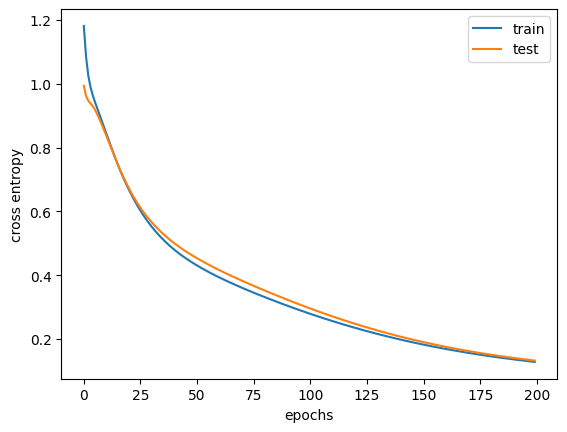

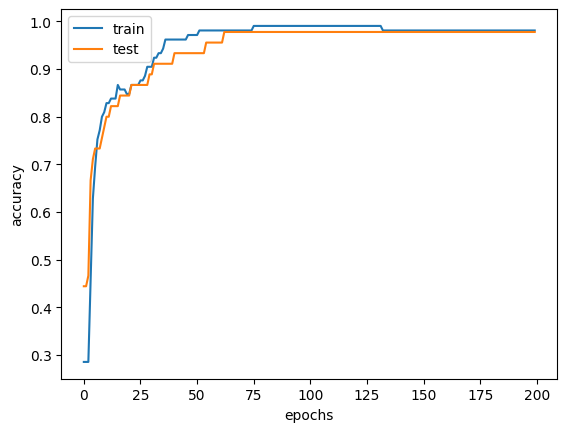

In [51]:
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()
 
plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()